## Assignment 3 - Edge detection
__DESCRIPTION__

Finding text using edge detection



The purpose of this assignment is to use computer vision to extract specific features from images. In particular, we're going to see if we can find text. We are not interested in finding whole words right now; we'll look at how to find whole words in a coming class. For now, we only want to find language-like objects, such as letters and punctuation.



Download and save the image at the link below:



https://upload.wikimedia.org/wikipedia/commons/f/f4/%22We_Hold_These_Truths%22_at_Jefferson_Memorial_IMG_4729.JPG



Using the skills you have learned up to now, do the following tasks:



Draw a green rectangular box to show a region of interest (ROI) around the main body of text in the middle of the image. Save this as image_with_ROI.jpg.
Crop the original image to create a new image containing only the ROI in the rectangle. Save this as image_cropped.jpg.
Using this cropped image, use Canny edge detection to 'find' every letter in the image
Draw a green contour around each letter in the cropped image. Save this as image_letters.jpg


__TIPS__

Remember all of the skills you've learned so far and think about how they might be useful
This means: colour models; cropping; masking; simple and adaptive thresholds; binerization; mean, median, and Gaussian blur.
Experiment with different approaches until you are able to find as many of the letters and punctuation as possible with the least amount of noise. You might not be able to remove all artifacts - that's okay!


__Bonus challenges__

If you want to push yourself, try to write a script which runs from the command line and which takes any similar input (an image containing text) and produce a similar output (a new image with contours drawn around every letter).


__General instructions__

For this exercise, you can upload either a standalone script OR a Jupyter Notebook
Save your script as edge_detection.py OR edge_detection.ipynb
If you have external dependencies, you must include a requirements.txt
You can either upload the script here or push to GitHub and include a link - or both!
Your code should be clearly documented in a way that allows others to easily follow along
Similarly, remember to use descriptive variable names! A name like cropped is more readable than crp.
The filenames of the saved images should clearly relate to the original image


__Purpose__

This assignment is designed to test that you have a understanding of:

how to use a variety of image processing steps;
how to perform edge detection;
how to combine these skills in order to find specific features in an image

In [217]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np

In [227]:
def __main__(): 
## First we load in the image with openCV
    fname = os.path.join("..","data","jefferson_img.jpg")
    image = cv2.imread(fname)

    # Then we define the height and width of the image which we use to make a rectangle surrounding the letters on the image
    (widthX, heightY) = image.shape[1], image.shape[0]
    cv2.rectangle(image, (widthX//4,heightY//4),((widthX//4)*3,(heightY//8)*7), (0,255,0), 4)
    
    # Here I used jimshow to show, but as this runs in the terminal it won't be neccessary

## Cropping the image

    from PIL import Image #we load in the the PIL package that makes it easy to crop and save the image

    im = Image.open(r"../data/jefferson_img.jpg") #defining the im witho our image
  
    # Setting the points for cropped image which we calculated above
    left = widthX//4
    top = heightY//4
    right = (widthX//4)*3
    bottom = (heightY//8)*7
  
    # Cropped image of above dimension 
    # It will not change orginal image as we save it as im1
    im1 = im.crop((left, top, right, bottom)) 

    # Then we save it as the image_cropped in the data folder
    im1.save("../data/image_cropped.jpg")
    
## Loading the cropped image
    fname = os.path.join("..","data","image_cropped.jpg") #Now we load the cropped image
    cropped_image = cv2.imread(fname) #defining it the same way as with the original image


## Blurred Image 
#Now we make the blurred image and use the canny edge to then create contours around the letters
    blurred = cv2.GaussianBlur(cropped_image, (5,5), 0) #we set the kernel of 5,5

    canny = cv2.Canny(blurred, 100, 150) #I tried messing around with the setting of the blur but figured this was the best

    # jimshow_channel(canny) #once again just a test in the original script which won't be needed now. 

    (contours, _) = cv2.findContours(canny.copy(), #using a copy of the canny image to find the countours
                    cv2.RETR_EXTERNAL, #filtering internal structures hieararchially
                    cv2.CHAIN_APPROX_SIMPLE)

    image_text = cv2.drawContours(cropped_image.copy(), # draw contours on original
                        contours,      # our list of contours
                        -1,            # which contours to draw
                        (0,255,0),     # contour color
                        2)  
    cv2.imwrite("../data/image_letters.jpg", image_text)

#At last we save the image with the green contours surrounding the letters and a bit of noise around. 

if __name__ == __main__:
    __main__



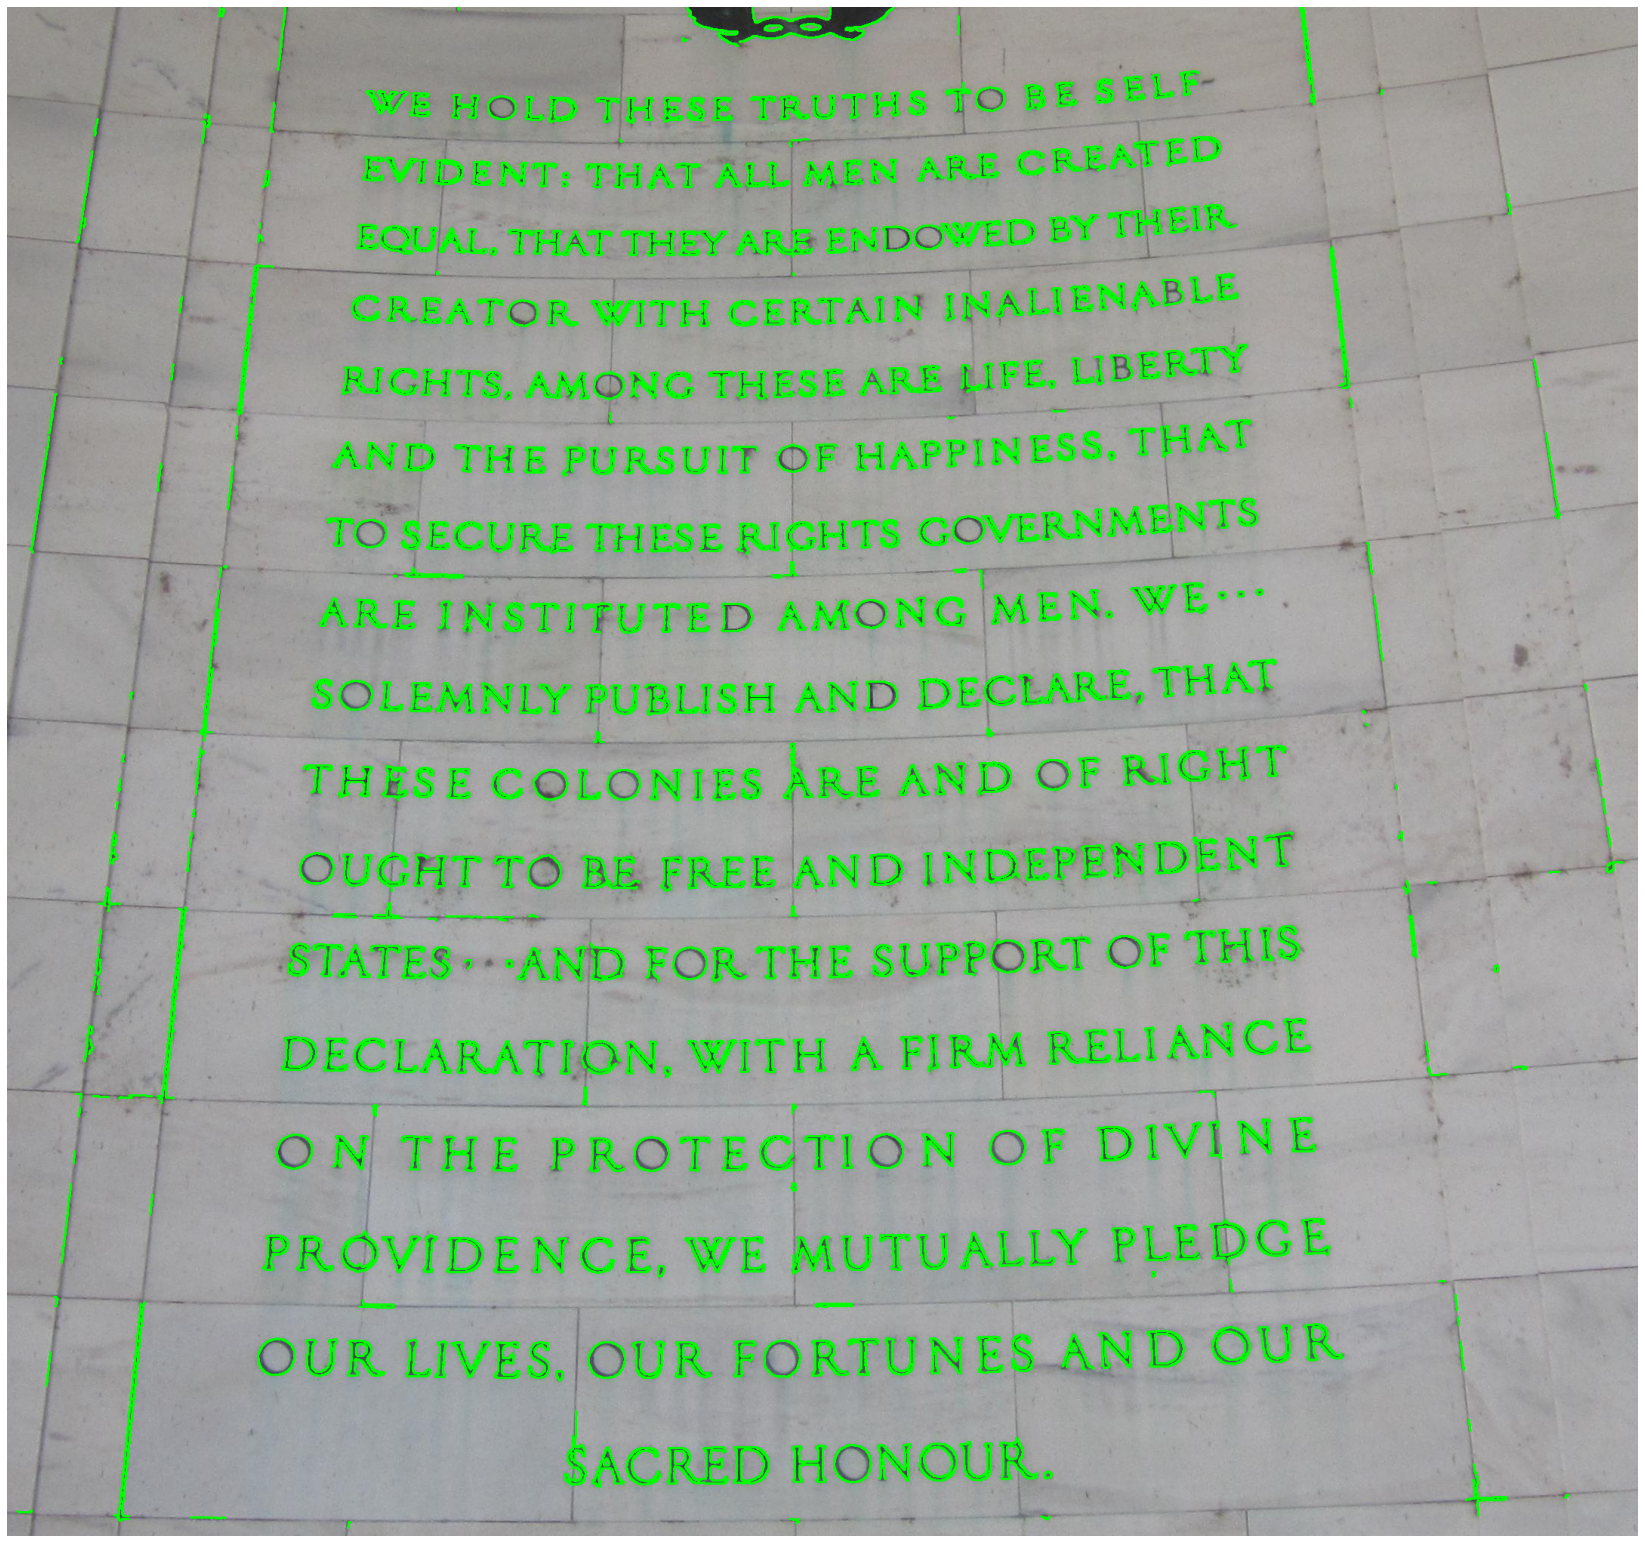

In [211]:
#This just shows we have the result we want
#jimshow(cv2.drawContours(cropped_image.copy(), # draw contours on original
                    #    contours,      # our list of contours
                    #     -1,            # which contours to draw
                    #    (0,255,0),     # contour color
                    #    2))            # contour pixel width